<a href="https://www.kaggle.com/code/ayushs9020/health-insurance-prediction-eda?scriptVersionId=128403852" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1 | Health Insurance Prediction ❤️‍🩹
<img src = "https://pbs.twimg.com/media/EDORK3cUEAAr4As.jpg">

## About Dataset

## Context
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

## Data Description
|Variable|Definition|
|---|---|
|id|Unique ID for the customer
|Gender|Gender of the customer
|Age|Age of the customer
|Driving_License|0 : Customer does not have DL
||1 : Customer already has DL
|Region_Code|Unique code for the region of the customer
|Previously_Insured|1 : Customer already has Vehicle Insurance
||0 : Customer doesn't have Vehicle Insurance
|Vehicle_Age|Age of the Vehicle
|Vehicle_Damage|1 : Customer got his/her vehicle damaged in the past
||0 : Customer didn't get his/her vehicle damaged in the past.
|Annual_Premium|The amount customer needs to pay as premium in the year
|Policy_Sales_Channel|Anonymized Code for the channel of outreaching to the customer
|Vintage|Number of Days, Customer has been associated with the company
|Response|1 : Customer is interested
||0 : Customer is not interested

## Evaluation Metric
The evaluation metric for this hackathon is ROC_AUC score.

## Public and Private split
The public leaderboard is based on 40% of test data, while final rank would be decided on remaining 60% of test data (which is private leaderboard)

## Guidelines for Final Submission
Please ensure that your final submission includes the following:

1. Solution file containing the predicted response of the customer (Probability of response 1)
2. Code file for reproducing the submission, note that it is mandatory to submit your code for a valid final submission

# 2 | Importing the Modules

In [1]:
# **DATASET PRE-PROCESSING**

import numpy as np 
import pandas as pd 

# **DATA VISUALIZATION**

import seaborn as sns 

# **DATA PREPROCESSING**

from sklearn.preprocessing import FunctionTransformer

# **MACHINE LEARNING MODELS**

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# **METRICS**

from sklearn.metrics import classification_report

# **INPUT**

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv
/kaggle/input/health-insurance-cross-sell-prediction/train.csv
/kaggle/input/health-insurance-cross-sell-prediction/test.csv


Lets get our data into working

In [2]:
data = pd.read_csv("/kaggle/input/health-insurance-cross-sell-prediction/train.csv")

It is a good practice to take a look at our dataset before processing it

In [3]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


So we have $3,81,109$ or $350K+$ rows and $12$ columns accounting to $46,52,508$ or $4.5M+$ values 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


There are some numerical vales and some categorical values which we need to take care 

`id` column seems to be unique for every row and thus it would be fun to remove this guy

In [5]:
data.drop(["id"] , axis = 1 , inplace = True)

In [6]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# 3 | Data Analysis and Preprocessing 

# 3.1 | Gender 

Gender can affect car insurance rates due to statistical data showing that male drivers tend to be involved in more accidents and receive more traffic violations than female drivers. Insurance companies use this data to determine risk and set premiums accordingly. However, some countries have banned the use of gender as a factor in insurance pricing.

<AxesSubplot:ylabel='Gender'>

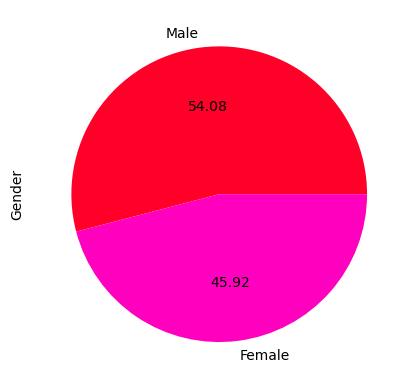

In [7]:
data["Gender"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

This is in pretty good condition

In [8]:
data["Gender"] = np.where(data["Gender"] == "Male" , 1 , 0)

# 3.2 | Age
Age is a significant factor that affects insurance rates for vehicles. Younger drivers, especially those under the age of $25$, typically have higher insurance rates because they are considered more risky to insure. Older drivers, on the other hand, may be eligible for lower insurance rates due to their experience and history of safe driving.

<AxesSubplot:xlabel='Age', ylabel='Density'>

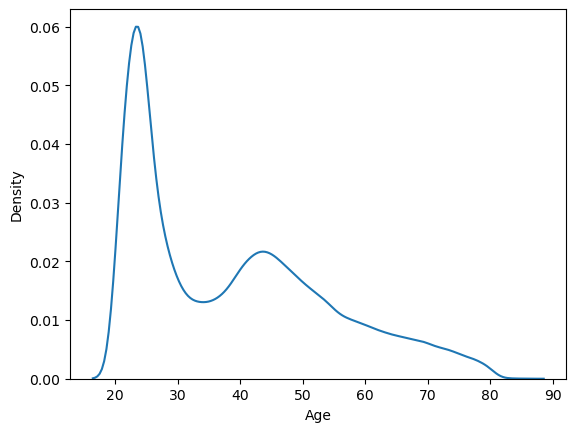

In [9]:
sns.kdeplot(data["Age"])

This is highly skewed towards right. Lets try to use `FunctionTransformer` here. We will be using `np.log1p`

If you want to know how the `FunctionTransformer` works, here is the code for you , and here is the notebook containing the **[explanation](https://www.kaggle.com/code/ayushs9020/function-transformers-from-scratch-in-python)** :)

```
! pip install numpy

import numpy as np 

def log(value):
    
    return np.log1p(value)

def square(value):
    
    return np.sqaure(value)

def yeo_johnson(value , lambdas):
    
    if value >= 0:
    
        if lambdas == 0:
    
            return (np.log1p(value))
    
        else:
    
            return ((((value + 1) ** lambdas) - 1) / lambdas)
    
    if value < 0:
    
        if lambdas == 2: 
    
            return (-np.log1p(-value))
    
        else : 
    
            return ((- ((((- value) + 1) ** 2 - lambdas) - 1)) / (2 - lambdas))

def box_cox(value , lambdas):

    if lambdas == 0:

        return np.log1p(value)

    else :

        return ((((value + 1) ** lambdas) - 1) / lambdas)

def function_transformer(array , func = None):

    if func == None:
        print("Please enter a function")
        return None

    elif func == "log" or func == "square":

        output_array = np.empty(shape = array.shape)

        if len(array.shape) == 1:
            new_array = np.empty(shape = (1 , 1))
            for i in array:

                if func == "log":

                    new_array = np.vstack([new_array , log_output(i)])
                
                else:
                    
                    new_array = np.vstack([new_array , square(i)])
            
            new_array = np.delete(new_array , 0 , 0)

            return new_array

        else :
            
            for i in array:
            
                new_array = np.empty(shape = (1 , 1))
            
                for j in array[i]:
            
                    if func == "log":

                        new_array = np.vstack([new_array , log_output(i)])
                    else:
                    
                        new_array = np.vstack([new_array , square(i)])

                new_array = np.delete(new_array , 0 , 0)

                output_array = np.hstack([output_array , new_array])
                output_array = np.delete(output_array , 0 , 1)

            return output_array
    
    elif func == "box_cox" or func == "yeo_johnson":
        
        output_array = np.empty(shape = array.shape)

        if len(array.shape) == 1:

            array_list = []
            skew_list = []
            
            for constant in range(-5 , 5):
            
                new_array = np.empty(shape = (1 , 1))

                for values in array:

                    if func == "box_cox":

                        new_array = np.vstack([new_array , box_cox(values , constant)])

                    else :
                        new_array = np.vstack([new_array , yeo_johnson(values , constant)])
                
                new_array = np.delete(new_array , 0 , 0)
                
                array_list.append(new_array)
                skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

                output_array = array_list[np.argmin(skew_list)]
            
            return output_array

        elif len(array.shape) != 1:

            for columns in array:

                array_list = []
                skew_list = []
                
                for constant in range(-5 , 5):
                    
                    new_array = np.empty(shape = (1 , 1))

                    for values in array[columns]:

                        if func == "box_cox":

                            new_array = np.vstack([new_array , box_cox(values , constant)])

                        else :
                            
                            new_array = np.vstack([new_array , yeo_johnson(values , constant)])

                    new_array = np.delete(new_array , 0 , 0)
                    
                    array_list.append(new_array)
                    skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

                    output = array_list[np.argmin(skew_list)]

                output_array = np.hstack([output_array , output])

                output_array = np.delete(output_array , 0 , 1)

            return output_array

        else :
            print("Please enter a valid input")

    else :
        print("Please enter a valid function")
        return None
```

Though we will be using `sklearn.preprocessing.FunctionTransformer` here 

<AxesSubplot:xlabel='Age', ylabel='Density'>

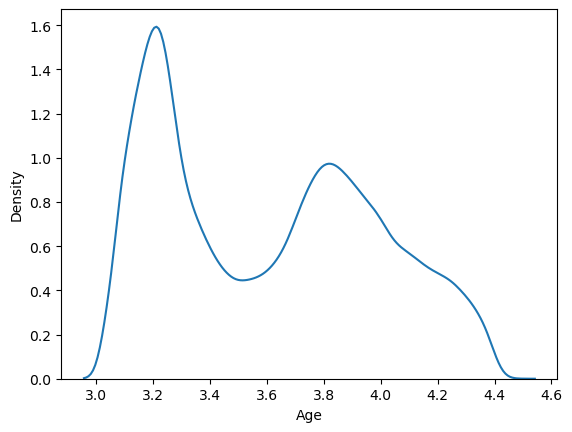

In [10]:
sns.kdeplot(FunctionTransformer(func = np.log1p).fit_transform(data["Age"]))

And this is really great, lets replace this with the original column

In [11]:
data = pd.concat([FunctionTransformer(func = np.log1p).fit_transform(data["Age"]) , 
                 data.drop("Age" , axis = 1)] , 
                axis = 1 , join = "inner")

In [12]:
data

,Age,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,3.806662,1,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,4.343805,1,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3.871201,1,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,3.091042,1,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,3.401197,0,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,4.317488,1,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,3.433987,1,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,3.091042,1,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,4.234107,0,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# 3.3 | Driving_License
Holding a valid driving license can positively affect the cost of insurance premiums for a vehicle. Drivers with a license are considered less of a risk to insurance companies, as they have demonstrated knowledge of traffic rules and basic driving skills. On the other hand, drivers without a license or with a history of traffic violations may face higher insurance rates due to the perceived higher risk of accidents or traffic violations.

<AxesSubplot:ylabel='Driving_License'>

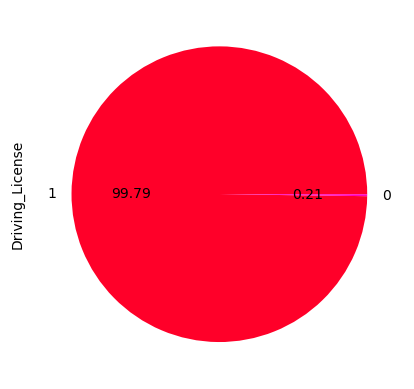

In [13]:
data["Driving_License"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

This column is of no use as most of its values are same. So we will just drop it 

In [14]:
data.drop("Driving_License" , axis = 1 , inplace = True)

In [15]:
data

,Age,Gender,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,3.806662,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,4.343805,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3.871201,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,3.091042,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,3.401197,0,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,4.317488,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,3.433987,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,3.091042,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,4.234107,0,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# 3.4 | Previously_Insured
If previously insured, it may indicate a responsible driving history which could result in lower insurance premiums. On the other hand, if a person has a history of accidents or claims, their previous insurance may affect their ability to obtain coverage or the cost of their premiums. Ultimately, a person's previous insurance history is one of many factors that can impact their insurance rates and eligibility for coverage.

<AxesSubplot:ylabel='Previously_Insured'>

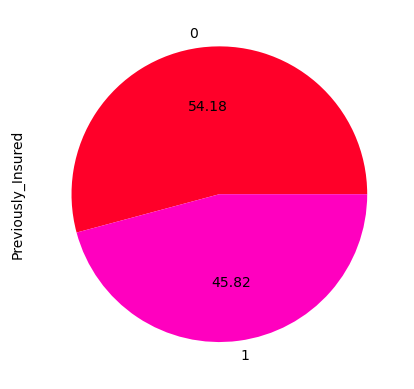

In [16]:
data["Previously_Insured"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

And this is in really good condition 

# 3.5 | Vehicle Age
Vehicle age can have a significant impact on insurance premiums.
As vehicles get older, their value decreases and the cost of repairs may increase, leading to higher premiums.
Older vehicles may also be considered more of a risk to insure due to their potential for mechanical issues or safety concerns.

<AxesSubplot:ylabel='Vehicle_Age'>

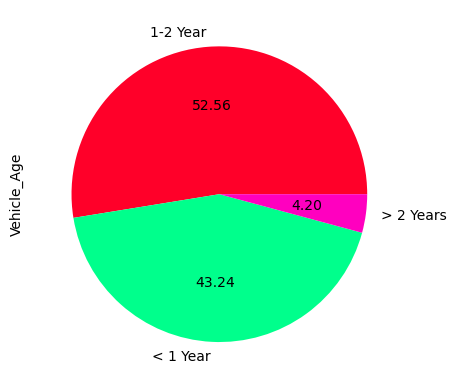

In [17]:
data["Vehicle_Age"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

Though it has a small percentage $4.20$ of the class `>2 Years`, we will still move on with that 

# 3.6 | Vehicle_Damage
Vehicle damage can significantly affect insurance premiums, especially if the driver is at fault for the accident. Insurance companies use the severity and frequency of past accidents to assess the risk of insuring a driver, and a history of vehicle damage can indicate a higher risk. In some cases, insurance coverage may also be denied or canceled due to repeated vehicle damage claims.

<AxesSubplot:ylabel='Vehicle_Damage'>

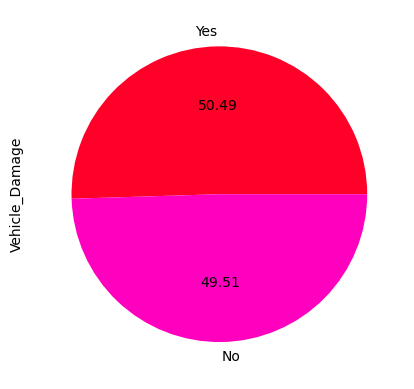

In [18]:
data["Vehicle_Damage"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

In [19]:
data["Vehicle_Damage"] = np.where(data["Vehicle_Damage"] == "Yes" , 1 , 0)

# 3.7 | Annual_Premium
The annual premium of vehicle insurance can indirectly impact healthcare insurance by affecting a person's overall financial health.
If a person's vehicle insurance premium is high, they may have less disposable income to allocate towards healthcare expenses or insurance premiums.
This could lead to individuals forgoing or reducing their healthcare coverage, which could ultimately impact their health and well-being.

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

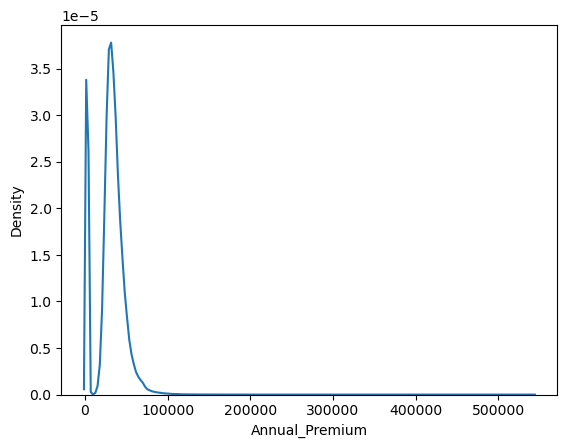

In [20]:
sns.kdeplot(data["Annual_Premium"])

The data is higly unstable. Lets try to place a kink at $80,000$ and then see it 

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

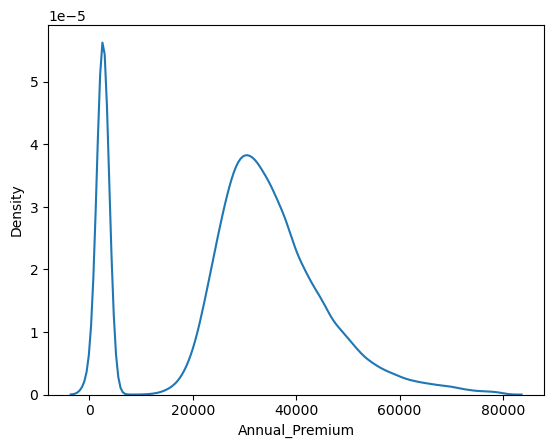

In [21]:
data["Annual_Premium"] = np.where(data["Annual_Premium"] >80000 , 0 , data["Annual_Premium"])
sns.kdeplot(data["Annual_Premium"])

And now it is in a pretty good condition 
# 3.8 | Vintage 

The length of time a customer has been associated with a healthcare insurance company can have a significant impact on their overall health care coverage.
As customers continue to stay with the same healthcare insurance provider, they may receive additional benefits, such as lower premiums, better coverage, and access to more health care services.
Furthermore, long-term customers may also have a higher likelihood of receiving personalized attention and support from the insurance company, leading to better health outcomes and overall satisfaction with their coverage.

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

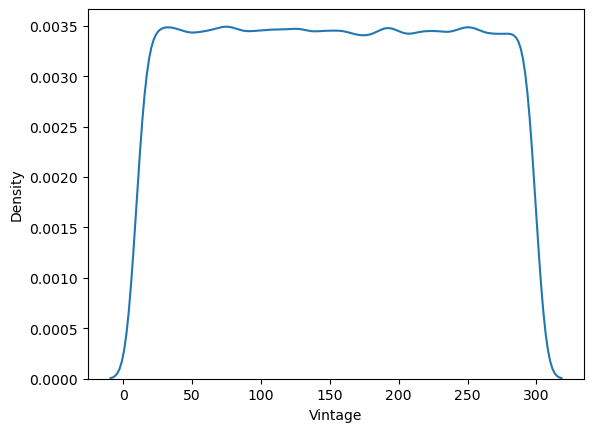

In [22]:
sns.kdeplot(data["Vintage"])

Our data after a bit of preprocessing looks like this 

In [23]:
data

,Age,Gender,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,3.806662,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,4.343805,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3.871201,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,3.091042,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,3.401197,0,41.0,1,< 1 Year,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,4.317488,1,26.0,1,1-2 Year,0,30170.0,26.0,88,0
381105,3.433987,1,37.0,1,< 1 Year,0,40016.0,152.0,131,0
381106,3.091042,1,30.0,1,< 1 Year,0,35118.0,160.0,161,0
381107,4.234107,0,14.0,0,> 2 Years,1,44617.0,124.0,74,0


# 4 | Categorical Encoding

We cannot just feed `str` input to any mathematical model. We first encode them into a numeircal vector, and then we can feed them into the model. 

If you want to know how we encode values in deep, here is the code for you, and here is the **[explanation](https://www.kaggle.com/code/ayushs9020/one-hot-encoder-from-scratch)** to it 

```
class OneHotEncoder:

    def __init__(self , min_frequency = None , max_categories = None , dtype = float):
        self.min_frequency = min_frequency
        self.max_categories = max_categories
        self.dtype = dtype
    def fit_transform(self , dataframe , columns):

        if type(self.min_frequency) == int:
            
            pass
        
        else : 
            
            self.min_frequency *= len(columns)

        if not self.min_frequency == None:
        
            if len(columns) == 1 :
                
                inf = [categories 
                    for categories in dataframe[columns[0]].value_counts().index 
                    if dataframe[columns[0]].value_counts()[categories] > self.min_frequency]
            
                for categories in dataframe[columns[0]].value_counts().index:
            
                    if not categories in inf:
            
                        dataframe[columns[0] + "_" + categories[0]] = np.where(dataframe[columns[0]] == categories[0] , dtype(1) , dtype(0))
            
                    else: 
            
                        dataframe[columns[0] + "_other"] = np.where(dataframe[columns[0]].isin(inf) , dtype(1) , dtype(0))
        
                    if drop == "first" or drop == "if_binary" :
        
                            dataframe.drop(str(columne[0]) + "_" + sample_data[columne[0]].value_counts.index[0] , 
                                        axis = 1 , inplace = True)
        
                    dataframe.drop(columne[0] , axis = 1 , inplace = True)
            else :
        
                for feature in columns:
                    
                    inf = [categories 
                        for categories in dataframe[feature].value_counts().index 
                        if dataframe[feature].value_counts()[categories] > self.min_frequency]
                
                    for categories in dataframe[feature].value_counts().index:
                
                        if not categories in inf:
                
                            dataframe[feature + "_" + categories] = np.where(dataframe[feature] == categories , dtype(1) , dtype(0))
                
                        else: 
                
                            dataframe[feature + "_other"] = np.where(dataframe[feature].isin(inf) , dtype(1) , dtype(0))
        
                        if drop == "first" or drop == "if_binary" :
        
                            dataframe.drop(str(feature) + "_" + sample_data[feature].value_counts.index[0] , 
                                        axis = 1 , inplace = True)
        
                    dataframe.drop(feature , axis = 1 , inplace = True) 

        elif not self.max_categories == None:
            
            if len(columns) == 1:
        
                inf = dataframe[columnes[0]].value_counts().index[self.max_categories : ]
        
                for categories in dataframe[columnes[0]].value_counts().index[: self.max_categories]:
        
                    dataframe[columnes[0] + "_" + categories[0]] = np.where(dataframe[columnes[0]] == categories[0] , dtype(1) , dtype(0))
        
                dataframe[columnes[0] + "_other"] = np.where(dataframe[columnes[0]].isin(inf) , dtype(1) , dtype(0))
        
                if drop == "first" or drop == "if_binary" :
        
                            dataframe.drop(str(columne[0]) + "_" + sample_data[columne[0]].value_counts.index[0] , 
                                        axis = 1 , inplace = True)
        
                dataframe.drop(columnes[0] , axis = 1 , inplace = True)

            else :

                for feature in columns:
            
                    inf = dataframe[feature].value_counts().index[self.max_categories : ]
            
                    for categories in dataframe[feature].value_counts().index[: max_categories]:
            
                        dataframe[feature + "_" + categories] = np.where(dataframe[feature] == categories , dtype(1) , dtype(0))
            
                    dataframe[feature + "_other"] = np.where(dataframe[feature].isin(inf) , dtype(1) , dtype(0))
        
                    if drop == "first" or drop == "if_binary" :
        
                            dataframe.drop(str(feature) + "_" + sample_data[feature].value_counts.index[0] , 
                                        axis = 1 , inplace = True)
        
                    dataframe.drop(feature , axis = 1 , inplace = True)

        else :    
            
            if len(columns) == 1:
                    
                for categories in dataframe[columns[0]].value_counts().index[0]:
                    
                    dataframe[columns[0] + "_" + categories[0]] = np.where(dataframe[columns[0]] == categories[0] , dtype(1) , dtype(0))
        
                if drop == "first" or drop == "if_binary" :
        
                            dataframe.drop(str(columns[0]) + "_" + sample_data[columns[0]].value_counts.index[0] , 
                                        axis = 1 , inplace = True)
        
                dataframe.drop(columns[0] , axis = 1 , inplace = True)

            else : 
            
                for feature in columns:
                        
                    for categories in dataframe[feature].value_counts().index[0]:
                        
                        dataframe[feature + "_" + categories] = np.where(dataframe[feature] == categories , dtype(1) , dtype(0))
        
                    if drop == "first" or drop == "if_binary" :
        
                            dataframe.drop(str(feature) + "_" + sample_data[feature].value_counts.index[0] , 
                                        axis = 1 , inplace = True)    
        
                    dataframe.drop(feature , axis = 1 , inplace = True)
```

Though here we will be using `pandas.get_dummies()`

In [24]:
data = pd.concat([pd.get_dummies(data["Vehicle_Age"]) , 
                 data.drop("Vehicle_Age" , axis = 1)] , 
                axis = 1 , join = "inner")

In [25]:
data

,1-2 Year,< 1 Year,> 2 Years,Age,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,1,3.806662,1,28.0,0,1,40454.0,26.0,217,1
1,1,0,0,4.343805,1,3.0,0,0,33536.0,26.0,183,0
2,0,0,1,3.871201,1,28.0,0,1,38294.0,26.0,27,1
3,0,1,0,3.091042,1,11.0,1,0,28619.0,152.0,203,0
4,0,1,0,3.401197,0,41.0,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,0,0,4.317488,1,26.0,1,0,30170.0,26.0,88,0
381105,0,1,0,3.433987,1,37.0,1,0,40016.0,152.0,131,0
381106,0,1,0,3.091042,1,30.0,1,0,35118.0,160.0,161,0
381107,0,0,1,4.234107,0,14.0,0,1,44617.0,124.0,74,0


# 5 | Model Building 

Our data is now good to go for model building 

In [26]:
train , test = np.split(data.sample(frac = 1) , [int(0.8 * len(data))])

In [27]:
def pre(dataframe , oversampling = False):
    x = dataframe.drop("Response" , axis = 1)
    y = dataframe["Response"]
    
    return x , y

In [28]:
X_train , y_train = pre(train , oversampling = True)

In [29]:
X_test , y_test = pre(test)

# 5.1 | K Nearest Neighbors Classifier

KNN (K-Nearest Neighbors) is a simple and popular machine learning algorithm used for both classification and regression tasks.
In KNN, the output is predicted based on the majority class or average of the k-nearest neighbors of the input data point in the feature space.
The value of k, which represents the number of nearest neighbors, is an important hyperparameter that needs to be tuned for optimal performance.

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/20200616145419/Untitled2781.png">

If you want to know more about `KNN` here is the code for you, and here is the notebook with the **[explanation](https://www.kaggle.com/code/ayushs9020/knn-from-scratch)**

```
from collections import Counter
import numpy as np 

def KNN(X_train , y_train , X_test):
    distance = [0] * X_train.shape[0]
    for columns in X_train.columns:
        for index in range(len(X_train[columns])):
            distance[index] += X_train[columns][index] - X_test[columns][index]
    distance = np.sqrt(np.array(distance))
    return Counter(y_test[np.argsort(distance)[:3]]).most_common()[0][0]
```

<img src = "https://www.mihaileric.com/static/knn-meme-d997d3c26b3769fc03492b12819c6223-d90b6.jpg">

In [30]:
KNN = KNeighborsClassifier()
KNN.fit(X_train , y_train)

KNeighborsClassifier()

# 5.2 | Decision Tree Classifier

Decision Tree Classifier is a supervised machine learning algorithm that predicts the target variable by recursively partitioning the data based on the feature values. It works by building a tree-like model where each internal node represents a decision based on a feature and each leaf node represents a class label. The algorithm selects the best feature to split the data at each node based on the criterion like entropy or Gini index.

<img src = "https://www.cfoselections.com/hubfs/when%20to%20use%20a%20decision%20tree%20for%20business%20planning.png">

```
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None
        
    def fit(self , X , y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)
    
    def _grow_tree(self, X, y, depth=0):
        
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)
    
    def _best_split(self, X, y, feat_idxs):
        
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold
    
    def _information_gain(self, y, X_column, threshold):

        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        child_entropy = (len(left_idxs)/len(y)) * (self.entropy(y[left_idxs])) + (len(right_idxs)/len(y)) * (self._entropy(y[right_idxs]))

        information_gain = parent_entropy - child_entropy
        return information_gain
    
    entropy = lambda self , y : -np.sum(np.array([p * np.log(p)
                                                 for p in (np.bincount(y) / len(y))]))
    
    def split(self, X_column, split_thresh):
        
        left = np.argwhere(X_column <= split_thresh).flatten()
        right = np.argwhere(X_column > split_thresh).flatten()
        
        return left , right
    
    def _most_common_label(self, y):
        
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        
        return value

    def predict(self, X):
        
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        
        if node.is_leaf_node():
            
            return node.value

        if x[node.feature] <= node.threshold:
            
            return self._traverse_tree(x, node.left)
        
        return self._traverse_tree(x, node.right)
```

<img src = "https://www.mihaileric.com/static/decision-tree-meme-29e8e977fa4a9dc3fa25e37d3507f09e-bc7bc.jpeg">

In [31]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train , y_train)

DecisionTreeClassifier()

# 6 | Metrics

Metrics in machine learning are used to evaluate the performance of a model.
They quantify the accuracy of a model's predictions by comparing them to the actual values.
Common metrics include accuracy, precision, recall, F1 score, and mean squared error.

We will be using the `classification report` here 

In [32]:
print(KNN , classification_report(y_test , KNN.predict(X_test)))
print(DTC , classification_report(y_test , DTC.predict(X_test)))

KNeighborsClassifier()               precision    recall  f1-score   support

           0       0.88      0.97      0.92     66800
           1       0.19      0.05      0.08      9422

    accuracy                           0.86     76222
   macro avg       0.53      0.51      0.50     76222
weighted avg       0.79      0.86      0.82     76222

DecisionTreeClassifier()               precision    recall  f1-score   support

           0       0.90      0.90      0.90     66800
           1       0.30      0.31      0.31      9422

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.83     76222



And we got an accuracy of around $86$%. And thats really great. We will try to improve it in further versions 

**THAT IT FOR TODAY GUYS**

**WILL BE WORKING ON IMPROVING IT FURTHER**

**PLEASE COMMENT YOUR THOUGHTS, HIHGLY APPRICIATED**

**DONT FORGET TO MAKE AN UPVOTE, IF YOU LIKED MY WORK**

<img src = "https://i.imgflip.com/19aadg.jpg">

**PEACE OUT !!!**